In [1]:
### Installing the required packages if not already installed
packages = ['numpy', 'pandas', 'warnings', 'sqlite3', 'sqlite3', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        %pip install {package}

import numpy as np                  # For numerical computing
import pandas as pd                 # For data manipulation
import sqlite3                      # For connecting to SQL database
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For plotting
import os

### Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Setting working directory
os.chdir('/Users/emilwilliamhansen/Desktop/Master-Thesis/Code')

In [2]:
### Extracting the data from the database
conn = sqlite3.connect('Data/data.db')

### Reading the data from the database
unfiltered_stock_ret_d = pd.read_sql('SELECT * FROM daily_returns', conn).set_index('Date').loc['1983':'2024']
unfiltered_stock_ret_m = pd.read_sql('SELECT * FROM monthly_returns', conn).set_index('Date').loc['1983':'2024']
stock_ret_d = pd.read_sql('SELECT * FROM filtered_daily_returns', conn).set_index('Date').loc['1983':'2024']
stock_ret_m = pd.read_sql('SELECT * FROM filtered_monthly_returns', conn).set_index('Date').loc['1983':'2024']
factor_ret_d = pd.read_sql('SELECT * FROM factors_daily', conn).set_index('Date').loc['1983':'2024']
factor_ret_m = pd.read_sql('SELECT * FROM factors_monthly', conn).set_index('Date').loc['1983':'2024']

### Closing the connection
conn.close()

#### Creating Table 2

In [3]:
table2 = pd.DataFrame(index = ['Stocks', 'Stocks (F)', 'RF', 'VW', 'EW', 'SMB', 'HML', 'UMD', 'BAB'],
                      columns = ['Frequency', 'Period', 'N', 'Mean', 'Volatility', 'Max', 'Min'])

table2['Frequency'] = ['D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M']
table2['Period'] = ['1980:01-2023:12', '1980:01-2023:12', '1980:01-2023:12', '1980:01-2023:12', '1980:01-2023:12', '1981:02-2023:12', '1981:07-2023:12', '1981:07-2023:12', '1983:01-2023:12']
table2['N'] = [len(unfiltered_stock_ret_m.columns), len(stock_ret_m.columns),
               f"{len(factor_ret_d['rf'].dropna())} & {len(factor_ret_m['rf'].dropna())}",
               f"{len(factor_ret_d['VW'].dropna())} & {len(factor_ret_m['VW'].dropna())}",
                f"{len(factor_ret_d['EW'].dropna())} & {len(factor_ret_m['EW'].dropna())}",
                f"{len(factor_ret_d['SMB'].dropna())} & {len(factor_ret_m['SMB'].dropna())}",
                f"{len(factor_ret_d['HML'].dropna())} & {len(factor_ret_m['HML'].dropna())}",
                f"{len(factor_ret_d['UMD'].dropna())} & {len(factor_ret_m['UMD'].dropna())}",
                f"{len(factor_ret_d['BAB'].dropna())} & {len(factor_ret_m['BAB'].dropna())}"]

table2['Mean'] = [f"{unfiltered_stock_ret_m.mean().mean()*12:.2%}", f"{stock_ret_m.mean().mean()*12:.2%}",
                  f"{factor_ret_m['rf'].mean()*12:.2%}", f"{factor_ret_m['VW'].mean()*12:.2%}",
                    f"{factor_ret_m['EW'].mean()*12:.2%}", f"{factor_ret_m['SMB'].mean()*12:.2%}",
                    f"{factor_ret_m['HML'].mean()*12:.2%}", f"{factor_ret_m['UMD'].mean()*12:.2%}",
                    f"{factor_ret_m['BAB'].mean()*12:.2%}"]

table2['Volatility'] = [f"{unfiltered_stock_ret_m.mean().std()*np.sqrt(12):.2%}", f"{stock_ret_m.mean().std()*np.sqrt(12):.2%}",
                        f"{factor_ret_m['rf'].std()*np.sqrt(12):.2%}", f"{factor_ret_m['VW'].std()*np.sqrt(12):.2%}",
                        f"{factor_ret_m['EW'].std()*np.sqrt(12):.2%}", f"{factor_ret_m['SMB'].std()*np.sqrt(12):.2%}",
                        f"{factor_ret_m['HML'].std()*np.sqrt(12):.2%}", f"{factor_ret_m['UMD'].std()*np.sqrt(12):.2%}",
                        f"{factor_ret_m['BAB'].std()*np.sqrt(12):.2%}"]
                  
table2['Min'] = [f"{unfiltered_stock_ret_m.min().min():.0%}", f"{stock_ret_m.min().min():.0%}",
                    f"{factor_ret_m['rf'].min():.2%}", f"{factor_ret_m['VW'].min():.2%}",
                    f"{factor_ret_m['EW'].min():.2%}", f"{factor_ret_m['SMB'].min():.2%}",
                    f"{factor_ret_m['HML'].min():.2%}", f"{factor_ret_m['UMD'].min():.2%}",
                    f"{factor_ret_m['BAB'].min():.2%}"]

table2['Max'] = [f"{unfiltered_stock_ret_m.max().max():.0%}", f"{stock_ret_m.max().max():.0%}",
                    f"{factor_ret_m['rf'].max():.2%}", f"{factor_ret_m['VW'].max():.2%}",
                    f"{factor_ret_m['EW'].max():.2%}", f"{factor_ret_m['SMB'].max():.2%}",
                    f"{factor_ret_m['HML'].max():.2%}", f"{factor_ret_m['UMD'].max():.2%}",
                    f"{factor_ret_m['BAB'].max():.2%}"]


table2

,Frequency,Period,N,Mean,Volatility,Max,Min
Stocks,D & M,1980:01-2023:12,1074,1473.47%,13305.53%,249900%,-100%
Stocks (F),D & M,1980:01-2023:12,995,14.41%,30.02%,11567%,-100%
RF,D & M,1980:01-2023:12,10290 & 492,5.71%,1.33%,2.07%,0.01%
VW,D & M,1980:01-2023:12,10290 & 492,17.51%,20.80%,19.95%,-25.95%
EW,D & M,1980:01-2023:12,10290 & 492,10.41%,24.42%,21.26%,-24.95%
SMB,D & M,1981:02-2023:12,10290 & 492,15.01%,18.81%,62.52%,-11.95%
HML,D & M,1981:07-2023:12,10290 & 492,8.01%,24.58%,91.54%,-29.09%
UMD,D & M,1981:07-2023:12,10290 & 492,13.40%,21.36%,22.41%,-25.95%
BAB,D & M,1983:01-2023:12,10290 & 492,16.70%,20.78%,37.97%,-22.28%


In [4]:
### Taking care of date
stock_ret_d.index = pd.to_datetime(stock_ret_d.index)
stock_ret_m.index = pd.to_datetime(stock_ret_m.index)
factor_ret_d.index = pd.to_datetime(factor_ret_d.index)
factor_ret_m.index = pd.to_datetime(factor_ret_m.index)

In [5]:
### Due to plotting, we will turn all factor returns into log returns
factor_log_ret_d = np.log(1 + factor_ret_d)
factor_log_ret_m = np.log(1 + factor_ret_m)

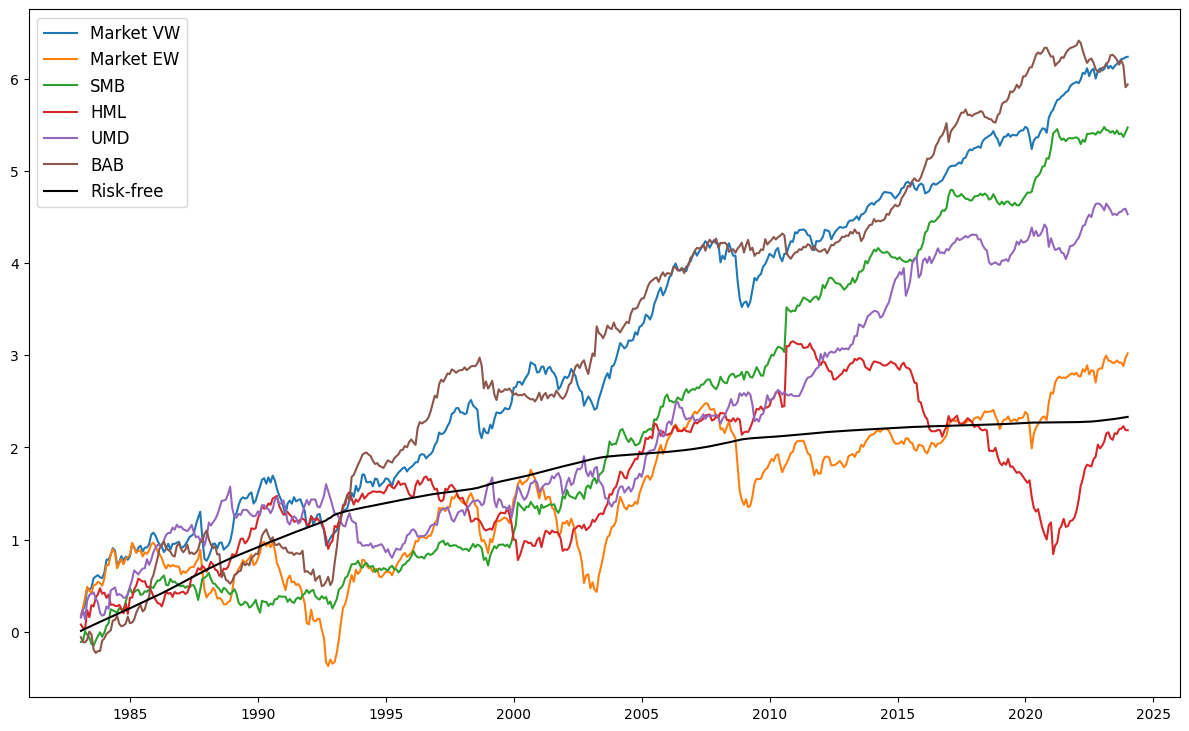

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12/1.618))

# Plotting cumulative returns for the entire period
axes.plot((factor_log_ret_m['VW'].cumsum()), label='Market VW')
axes.plot((factor_log_ret_m['EW'].cumsum()), label='Market EW')
axes.plot((factor_log_ret_m["SMB"].cumsum()), label='SMB')
axes.plot((factor_log_ret_m["HML"].cumsum()), label='HML')
axes.plot((factor_log_ret_m["UMD"].cumsum()), label='UMD')
axes.plot((factor_log_ret_m['BAB'].cumsum()), label='BAB')
axes.plot(factor_log_ret_m["rf"].cumsum(), color='black', label='Risk-free')
axes.legend(fontsize='large')
plt.tight_layout()
plt.savefig('Plots/cum_ret.png')
plt.show()

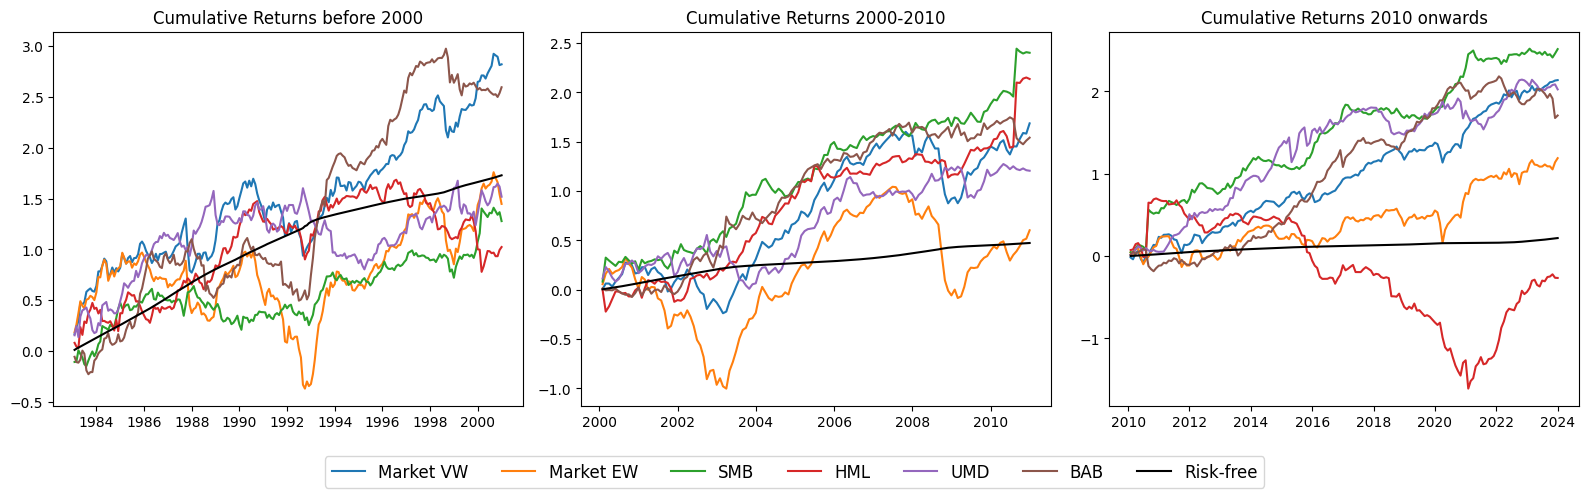

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plotting cumulative returns for the period before 2000
idx = factor_log_ret_m.loc[:'2000'].index
axes[0].plot((factor_log_ret_m['VW'].loc[idx]).cumsum(), label='Market VW')
axes[0].plot((factor_log_ret_m['EW'].loc[idx]).cumsum(), label='Market EW')
axes[0].plot((factor_log_ret_m["SMB"].loc[idx]).cumsum(), label='SMB')
axes[0].plot((factor_log_ret_m["HML"].loc[idx]).cumsum(), label='HML')
axes[0].plot((factor_log_ret_m["UMD"].loc[idx]).cumsum(), label='UMD')
axes[0].plot((factor_log_ret_m['BAB'].loc[idx]).cumsum(), label='BAB')
axes[0].plot(factor_log_ret_m["rf"].loc[idx].cumsum(), color='black', label='Risk-free')
axes[0].set_title('Cumulative Returns before 2000')

# Plotting cumulative returns for the period 2000-2010
idx = factor_log_ret_m.loc['2000':'2010'].index
axes[1].plot((factor_log_ret_m['VW'].loc[idx]).cumsum(), label='Market VW')
axes[1].plot((factor_log_ret_m['EW'].loc[idx]).cumsum(), label='Market EW')
axes[1].plot((factor_log_ret_m["SMB"].loc[idx]).cumsum(), label='SMB')
axes[1].plot((factor_log_ret_m["HML"].loc[idx]).cumsum(), label='HML')
axes[1].plot((factor_log_ret_m["UMD"].loc[idx]).cumsum(), label='UMD')
axes[1].plot((factor_log_ret_m['BAB'].loc[idx]).cumsum(), label='BAB')
axes[1].plot(factor_log_ret_m["rf"].loc[idx].cumsum(), color='black', label='Risk-free')
axes[1].set_title('Cumulative Returns 2000-2010')

# Plotting cumulative returns for the period 2010 onwards
idx = factor_log_ret_m.loc['2010':].index
axes[2].plot((factor_log_ret_m['VW'].loc[idx]).cumsum(), label='Market VW')
axes[2].plot((factor_log_ret_m['EW'].loc[idx]).cumsum(), label='Market EW')
axes[2].plot((factor_log_ret_m["SMB"].loc[idx]).cumsum(), label='SMB')
axes[2].plot((factor_log_ret_m["HML"].loc[idx]).cumsum(), label='HML')
axes[2].plot((factor_log_ret_m["UMD"].loc[idx]).cumsum(), label='UMD')
axes[2].plot((factor_log_ret_m['BAB'].loc[idx]).cumsum(), label='BAB')
axes[2].plot(factor_log_ret_m["rf"].loc[idx].cumsum(), color='black', label='Risk-free')
axes[2].set_title('Cumulative Returns 2010 onwards')

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=7, fontsize='large')

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legend
plt.savefig('Plots/cum_ret_periods.png')
plt.show()